In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/meteorite-landings.csv")
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


In [ ]:
df.head()

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45716 entries, 0 to 45715
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   name         45716 non-null  object 
 1   id           45716 non-null  int64  
 2   nametype     45716 non-null  object 
 3   recclass     45716 non-null  object 
 4   mass         45585 non-null  float64
 5   fall         45716 non-null  object 
 6   year         45428 non-null  float64
 7   reclat       38401 non-null  float64
 8   reclong      38401 non-null  float64
 9   GeoLocation  38401 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 3.5+ MB


In [ ]:
ans = pd.DataFrame(columns = ['column name', 'non-null count'])

for col in df:
  temp_data = df[col].dropna()
  ans.loc[len(ans)] = [col, len(temp_data)]

ans

,column name,non-null count
0,name,45716
1,id,45716
2,nametype,45716
3,recclass,45716
4,mass,45585
5,fall,45716
6,year,45428
7,reclat,38401
8,reclong,38401
9,GeoLocation,38401


In [ ]:
df.describe()

,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [ ]:
name_data = df['name']
string = name_data.apply(lambda x : isinstance(x, str)).sum()
empty_string = name_data.apply(lambda x: x == ' ').sum()
null = name_data.isnull().sum()
unique = name_data.nunique()
pd.DataFrame({'strings' : [string], 'unique entries': [unique],
              'empty strings': [empty_string], 'null strings': [null]})


,strings,unique entries,empty strings,null strings
0,45716,45716,0,0


In [ ]:
df = df.dropna(subset=['reclong','reclat'])
df = df[df.reclong < 300]

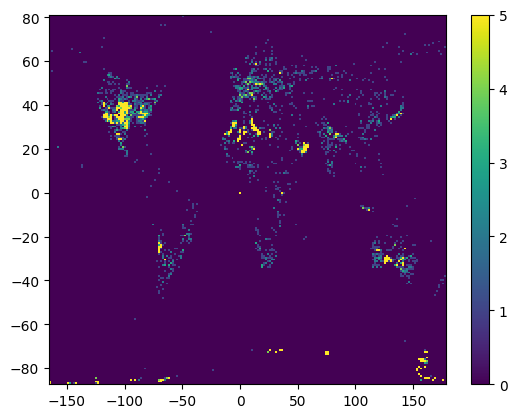

In [ ]:
plt.hist2d(df.reclong, df.reclat, bins = 200, vmax=5)
plt.colorbar();

<ipython-input-21-26b5b72f3b27>:5: UserWarning: The following kwargs were not used by contour: 'levles'
  plt.contour(X,Y,Z, levles=20)


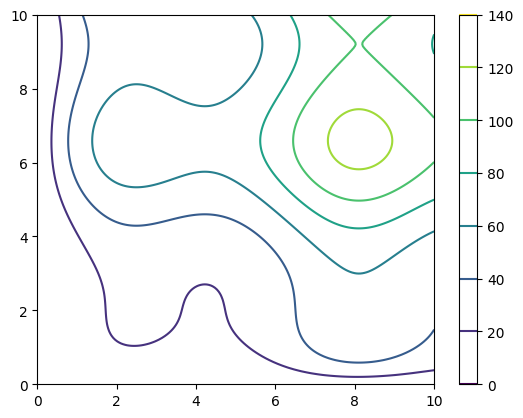

In [ ]:
spacing = np.linspace(0,10,200)
X,Y = np.meshgrid(spacing,spacing)
Z = (np.sin(X) + np.cos(Y) + 2 * np.arcsinh(X * Y))**2

plt.contour(X,Y,Z, levles=20)
plt.colorbar();

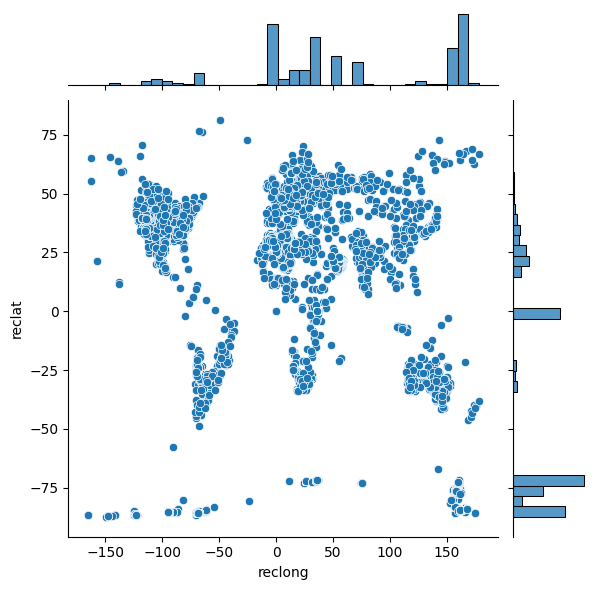

In [ ]:
sns.jointplot(data = df, x = 'reclong', y = 'reclat')


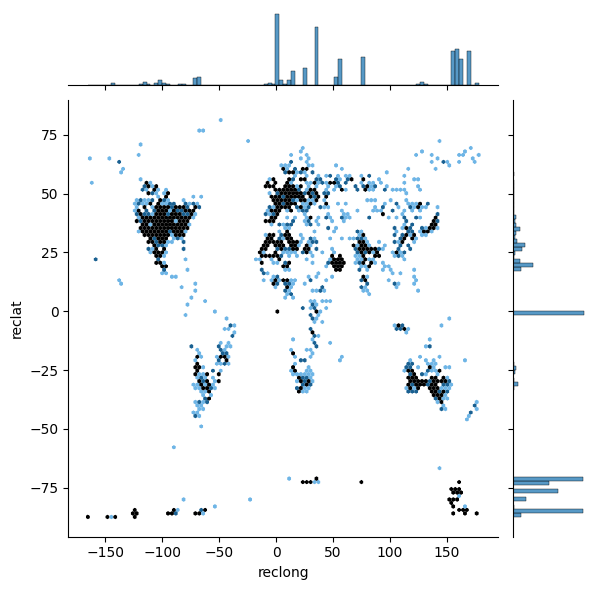

In [ ]:
sns.jointplot(data = df, x = 'reclong', y = 'reclat', kind='hex',
              gridsize=100, linewidth=0, vmax=3, marginal_kws = {"bins": 100})

In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

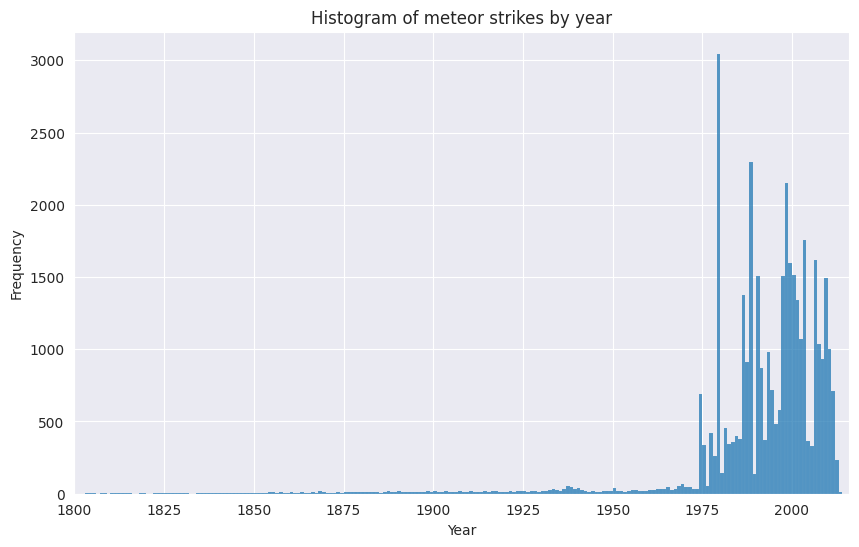

In [ ]:
sns.set_style("darkgrid")

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='year', binwidth=1)
plt.title("Histogram of meteor strikes by year")
plt.xlabel('Year')
plt.ylabel("Frequency")
plt.xlim(1800,2016)
plt.show()


In [ ]:
df.columns

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'fall', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

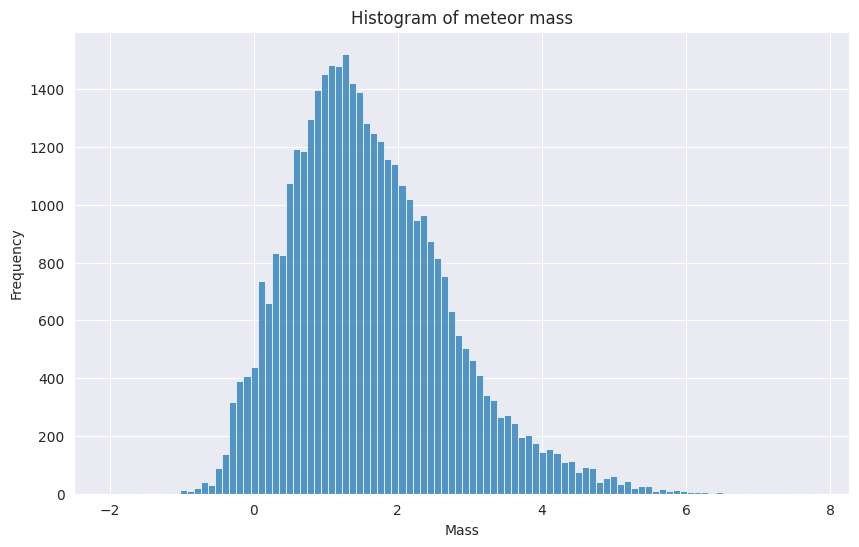

In [ ]:
sns.set_style('darkgrid')

mass_log = np.log10(df['mass'])

plt.figure(figsize=(10,6))
sns.histplot(data=mass_log,  bins=100)
plt.title("Histogram of meteor mass")
plt.xlabel('Mass')
plt.ylabel("Frequency")
plt.show()
